# OPTIMIZING NEURAL NETWORK TRAINING

In this exercise, we will explore the effects of several optimization techniques for the training and structure of neural networks. We will explore those techniques on the MNIST dataset [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data). Make sure to set the global seed of TensorFlow to a fixed value to ensure comparability across all implementations (see [here](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)).

a) Load the MNIST dataset via the respective built-in function of Keras. Scale the data to the range [0,1]. Visualize a few of the digits with its label.

b) Setup a model with an input layer that transforms the 28 by 28 input to a flattened vector of 784 features, a ReLU-activated dense layer with 32 hidden neurons, and a softmax-activated output layer with 10 neurons (1 for each class). Train this model on the training data for five epochs with an Adam optimizer, categorical cross-entropy as the loss function, and accuracy as a metric. What is the training and testing accuracy of this setup?

c) Try to improve the model by replacing the hidden layer with three ReLU-activated layers of 256, 128, and 64 neurons. What is the training and testing accuracy of this setup? What are the advantages and disadvantages of a deeper model?

d) Visualize the training curves of accuracy and cross-entropy of both models from before in a single diagram. Compare the curves. What do you notice? Are the training metrics suitable for representing the testing metrics?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

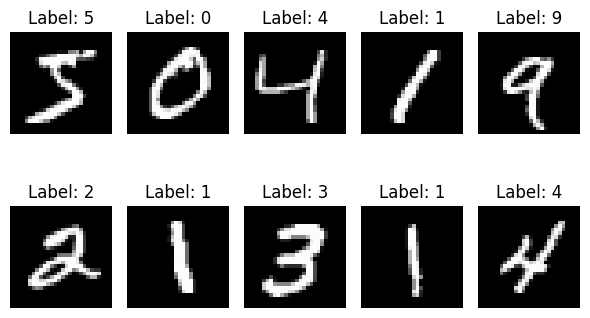

In [19]:
# a) Load the MNIST dataset
# Set the global seed for reproducibility
tf.random.set_seed(42)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Visualize a few digits with their labels
plt.figure(figsize=(6, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# b) Setup the model with one hidden layer
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
train_loss, train_acc = model_1.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model_1.evaluate(x_test, y_test, verbose=0)
print(f'Model 1 - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3532 - accuracy: 0.8992 - val_loss: 0.2072 - val_accuracy: 0.9389
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1844 - accuracy: 0.9463 - val_loss: 0.1717 - val_accuracy: 0.9494
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9564 - val_loss: 0.1354 - val_accuracy: 0.9590
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9636 - val_loss: 0.1310 - val_accuracy: 0.9602
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9668 - val_loss: 0.1294 - val_accuracy: 0.9605
Model 1 - Training accuracy: 0.9709, Testing accuracy: 0.9605


  1/313 [..............................] - ETA: 5s

313/313 [==============================] - 0s 1ms/step


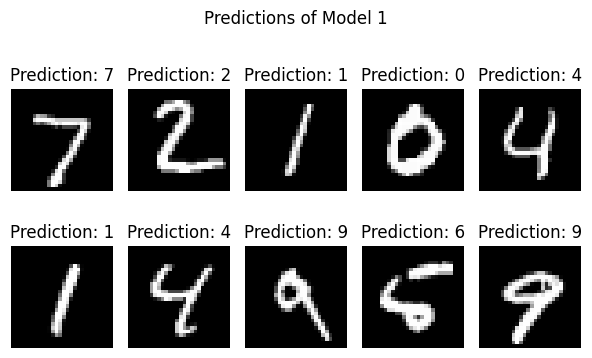

In [17]:
# show the predictions of model 1
predictions = model_1.predict(x_test)
plt.figure(figsize=(6, 4))
plt.suptitle('Predictions of Model 1')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# c) Improve the model with three hidden layers
model_2 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the improved model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the improved model
history_2 = model_2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the improved model
train_loss, train_acc = model_2.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=0)
print(f'Model 2 - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2137 - accuracy: 0.9352 - val_loss: 0.1120 - val_accuracy: 0.9656
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.1431 - val_accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.0765 - val_accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0956 - val_accuracy: 0.9715
Model 2 - Training accuracy: 0.9878, Testing accuracy: 0.9715


313/313 [==============================] - 1s 2ms/step


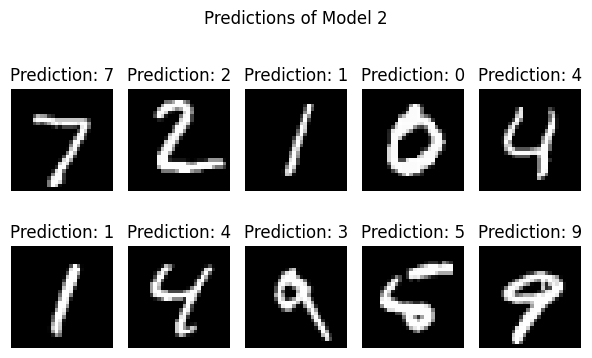

In [18]:
# show the predictions of model 2, with title 'Predictions of Model 2 - 10 first instances'
predictions = model_2.predict(x_test)
plt.figure(figsize=(6, 4))
plt.suptitle('Predictions of Model 2')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()

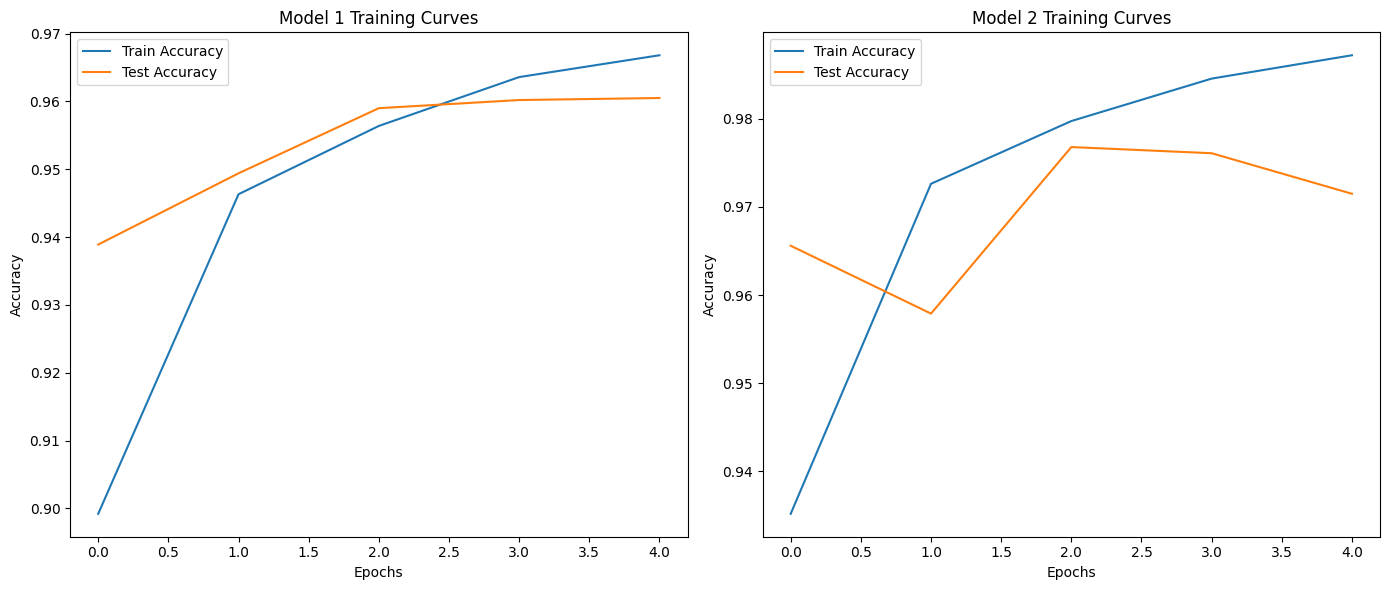

In [5]:
# d) Visualize training curves
plt.figure(figsize=(14, 6))

# Training curves for Model 1
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Test Accuracy')
plt.title('Model 1 Training Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training curves for Model 2
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Test Accuracy')
plt.title('Model 2 Training Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Analysis of deeper models
Advantages of deeper models:

- Can capture more complex patterns.

- Potentially better performance on complex datasets.

  

Disadvantages of deeper models:

- Increased risk of overfitting.

- Longer training time.

- More hyperparameters to tune.